In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/gastric-cancer-classification")

print("Path to dataset files:", path)

100%|██████████| 3.45G/3.45G [01:30<00:00, 40.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2


In [2]:
import os

os.listdir(path)

['Images', 'baseline_checkpoints']

In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images"

for root, dirs, files in os.walk(dataset_path):
    print(root, len(files))


/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images 0
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images 0
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour 0
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour/Secretory 0
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour/Secretory/LYM 3887
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour/Secretory/MUC 3887
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour/Secretory/DEB 3887
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images/Non-Tumour/Epithelial 0
/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versi

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_dir = "/root/.cache/kagglehub/datasets/andrewmvd/gastric-cancer-classification/versions/2/Images/Images"

img_size = (100, 100)
batch_size = 16
seed = 32

# Train / validation split from folders
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)


Found 31096 files belonging to 2 classes.
Using 24877 files for training.
Found 31096 files belonging to 2 classes.
Using 6219 files for validation.
Classes: ['Non-Tumour', 'Tumour']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


norm.........

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

normalization_layer = layers.Rescaling(1./225)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./225)

inputs = keras.Input(shape=img_size + (3,))

x = normalization_layer(inputs)

# Block 1
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2,2))(x)

# Block 2
x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2,2))(x)

# Block 3
x = layers.Conv2D(128, (3,3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2,2))(x)

# Global pooling + classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,506 (365.26 KB)

 Trainable params: 93,506 (365.26 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 641s 387ms/step - accuracy: 0.8727 - loss: 0.3669 - val_accuracy: 0.8710 - val_loss: 0.3528
Epoch 2/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 604s 361ms/step - accuracy: 0.8755 - loss: 0.3023 - val_accuracy: 0.8680 - val_loss: 0.2904
Epoch 3/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 605s 364ms/step - accuracy: 0.8774 - loss: 0.2783 - val_accuracy: 0.8595 - val_loss: 0.2909
Epoch 4/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 657s 386ms/step - accuracy: 0.8823 - loss: 0.2698 - val_accuracy: 0.8902 - val_loss: 0.2527
Epoch 5/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 642s 387ms/step - accuracy: 0.8869 - loss: 0.2568 - val_accuracy: 0.8915 - val_loss: 0.2471
Epoch 6/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 645s 387ms/step - accuracy: 0.8900 - loss: 0.2507 - val_accuracy: 0.8900 - val_loss: 0.2615
Epoch 7/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 633s 383ms/step - accuracy: 0.8941 - loss: 0.2460 - val_accuracy: 0.9022 - val_loss: 0.2255
Epoch 8/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 609s 361ms/step - ac

In [11]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")


389/389 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.9101 - loss: 0.2114
Validation loss: 0.2215
Validation accuracy: 0.9016


A custom CNN trained on histopathology patches achieved a validation accuracy of ~90%, with a validation loss of ~0.22 after one epoch. This indicates that the model is already learning discriminative features for gastric tissue subtypes, although further training and tuning are likely to improve performance.”

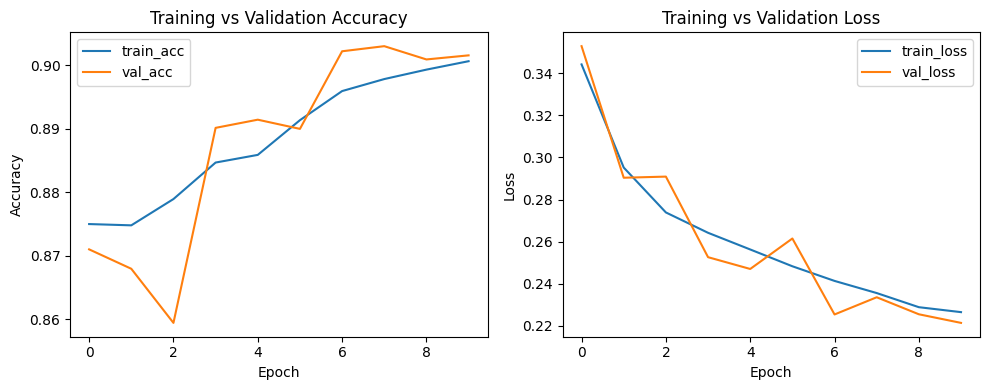

In [12]:
import matplotlib.pyplot as plt

# History object from model.fit(...)
hist = history.history

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(hist["accuracy"], label="train_acc")
plt.plot(hist["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(hist["loss"], label="train_loss")
plt.plot(hist["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.show()


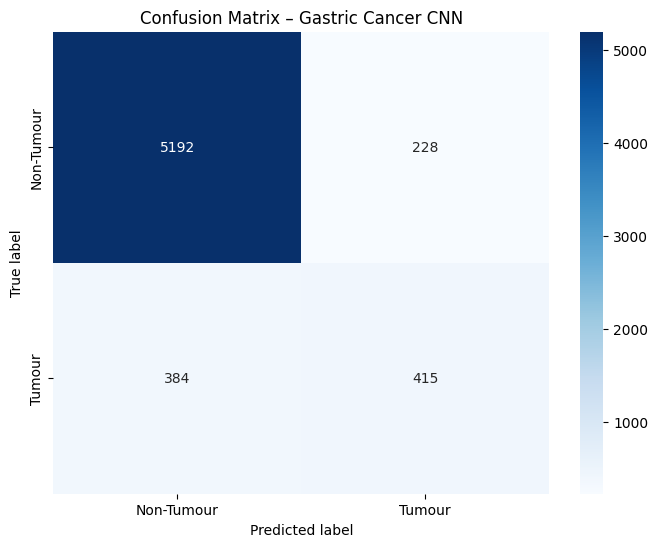

Classification report:

              precision    recall  f1-score   support

  Non-Tumour       0.93      0.96      0.94      5420
      Tumour       0.65      0.52      0.58       799

    accuracy                           0.90      6219
   macro avg       0.79      0.74      0.76      6219
weighted avg       0.89      0.90      0.90      6219



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Collect true and predicted labels on validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix – Gastric Cancer CNN")
plt.show()

# 3. Classification report
print("Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


due to low tumour recall

In [14]:
print(class_names)


['Non-Tumour', 'Tumour']


In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Extract labels from train_ds
y_train = np.concatenate([y.numpy() for _, y in train_ds])

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
class_weights


{0: np.float64(0.5708614438478131), 1: np.float64(4.0280116580310885)}

In [17]:
#retrain
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_balanced = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights
)


Epoch 1/5
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 615s 367ms/step - accuracy: 0.8337 - loss: 0.3497 - val_accuracy: 0.8218 - val_loss: 0.3738
Epoch 2/5
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 617s 368ms/step - accuracy: 0.8398 - loss: 0.3241 - val_accuracy: 0.8411 - val_loss: 0.3331
Epoch 3/5
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 642s 389ms/step - accuracy: 0.8402 - loss: 0.3229 - val_accuracy: 0.8500 - val_loss: 0.3166
Epoch 4/5
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 616s 372ms/step - accuracy: 0.8374 - loss: 0.3299 - val_accuracy: 0.8254 - val_loss: 0.3671
Epoch 5/5
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 645s 386ms/step - accuracy: 0.8457 - loss: 0.3158 - val_accuracy: 0.8453 - val_loss: 0.3259


In [18]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

  Non-Tumour       0.98      0.84      0.90      5420
      Tumour       0.45      0.86      0.59       799

    accuracy                           0.85      6219
   macro avg       0.71      0.85      0.75      6219
weighted avg       0.91      0.85      0.86      6219

